In [1]:
## Random walks
import numpy as np
import matplotlib.pyplot as plt
from Scripts import causal

C:\Users\Brandon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MemoryError: Unable to allocate 2.29 MiB for an array with shape (1000, 300) and data type float64

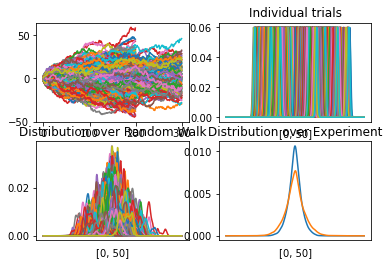

In [2]:
# Set parameters
numWalks = 1000
eps = 1000
sets = np.array([1, 2, 3, 4])

# Create a figure for plotting
plt.figure()

# Iterate over different sets
for j in sets:
    num_trials = 100 * j
    experiment_walks = np.empty([eps, numWalks])
    
    # Generate experiment walks
    for i in range(numWalks):
        sample_space = np.linspace(-75, 75, eps)
        
        # Generate random walk
        walk = causal.generate_random_walk(num_trials)
        
        # Generate Gaussian distributions
        gauss = causal.generate_gaussian_distribution(walk)
        
        # Calculate mixture distribution
        mixture = np.empty([eps, num_trials])
        for x, l in enumerate(gauss):
            mixture[:, x] = l.pdf(sample_space) / np.sum(l.pdf(sample_space))
        fullDist = np.sum(mixture, axis=1) / np.shape(mixture)[1]
        
        # Plot individual trials
        plt.subplot(221)
        plt.plot(walk)
        
        # Plot mixture distributions
        plt.subplot(222)
        plt.plot(mixture)
        plt.title('Individual trials')
        plt.xticks([])
        plt.xlabel([0,50])
        
        # Plot distribution over random walk
        plt.subplot(223)
        plt.plot(fullDist)
        plt.title('Distribution over Random Walk')
        plt.xticks([])
        plt.xlabel([0,50])
       
        experiment_walks[:, i] = fullDist
    
    # Calculate distribution over experiment walks
    experiment_walks = np.sum(experiment_walks, axis=1) / np.shape(experiment_walks)[1]
    
    # Plot distribution over experiment
    plt.subplot(224)
    plt.plot(experiment_walks)
    plt.title('Distribution over Experiment')
    plt.xticks([])
    plt.xlabel([0,50])


# Show the final plot
plt.tight_layout()
plt.show()

